In [1]:
import sys
from typing import Tuple


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from solution_1 import get_grid
from solution_1 import bfs_spiral_add_number_to_grid
from solution_1 import LIST_CYCLE_POSITION_SHIFT
from solution_1 import Grid
from solution_2 import bfs_spiral_add_number_to_grid_inpendent_of_grid


# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(linewidth=sys.maxsize)

In [2]:
def display_solution(matrix, figsize=(10,10)):
    # Get the shape of the matrix
    num_rows, num_cols = matrix.shape

    # Create a meshgrid for X and Y
    np_array_x = np.arange(0, num_cols, 1)
    np_array_y = np.arange(0, num_rows, 1)
    np_array_2d_x, np_array_2d_y = np.meshgrid(np_array_x, np_array_y)

    # Create a 3D plot
    figure_1 = plt.figure(figsize=figsize)
    axes_1 = figure_1.add_subplot(111, projection='3d')

    # Add labels
    axes_1.set_xlabel('X-axis')
    axes_1.set_ylabel('Y-axis')
    axes_1.set_zlabel('Height')

    # Plot the 3D surface
    axes_1.plot_surface(np_array_2d_x, np_array_2d_y, matrix, cmap='viridis')
    
    ####################
    
    figure_2 = plt.figure(figsize=figsize)
    axes_2 = figure_2.add_subplot(111)
    
    image = axes_2.imshow(matrix, cmap='viridis', origin='lower')
    colorbar = figure_2.colorbar(image, ax=axes_2)  # Add colorbar to the subplot

    axes_2.set_title('Height Matrix')
    axes_2.set_xlabel('X-axis')
    axes_2.set_ylabel('Y-axis')
    
    ####################
    
    # Calculate the gradient using np.gradient
    gradient_y, gradient_x = np.gradient(matrix)

    # Create a vector field
    vector_field_x = -gradient_x
    vector_field_y = -gradient_y
    
    figure_3 = plt.figure(figsize=figsize)
    axes_3 = figure_3.add_subplot(111)

    axes_3.quiver(vector_field_x, vector_field_y, scale=20, scale_units='xy', angles='xy')
    axes_3.set_title('Vector Field (Gradient)')
    axes_3.set_xlabel('X-axis')
    axes_3.set_ylabel('Y-axis')

        

# Initial data

In [3]:
list_cycle_position_shift = LIST_CYCLE_POSITION_SHIFT

grid_size_x = 30
grid_size_y = 30

position_start: Tuple[int, int] = (18, 12)


# Solution 1

In [4]:
grid_1 = get_grid(grid_size_x, grid_size_y)

bfs_spiral_add_number_to_grid(
    grid_1, 
    position_start, 
    list_cycle_position_shift
)
    
matrix_1 = np.array(grid_1)
print(matrix_1)

[[900 870 812 756 702 650 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600]
 [899 869 811 755 701 649 576 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529]
 [898 868 810 754 700 648 575 506 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442]
 [897 867 809 753 699 647 574 505 420 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 443]
 [896 866 808 752 698 646 573 504 419 342 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 363 444]
 [895 865 807 751 697 645 572 503 418 341 272 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 291 364 445]
 [894 864 806 750 696 644 571 502 417 340 271 210 157 158 159 160 161 162 163 164 165 166 167 168 169 170 227 292 365 446]
 [893 863 805 749 695 643 570 501 416 339 270 209 156 111 112 113 114 115 116 117 118 119 120 121 122 171 228 293 366 447]
 [892 862 804 74

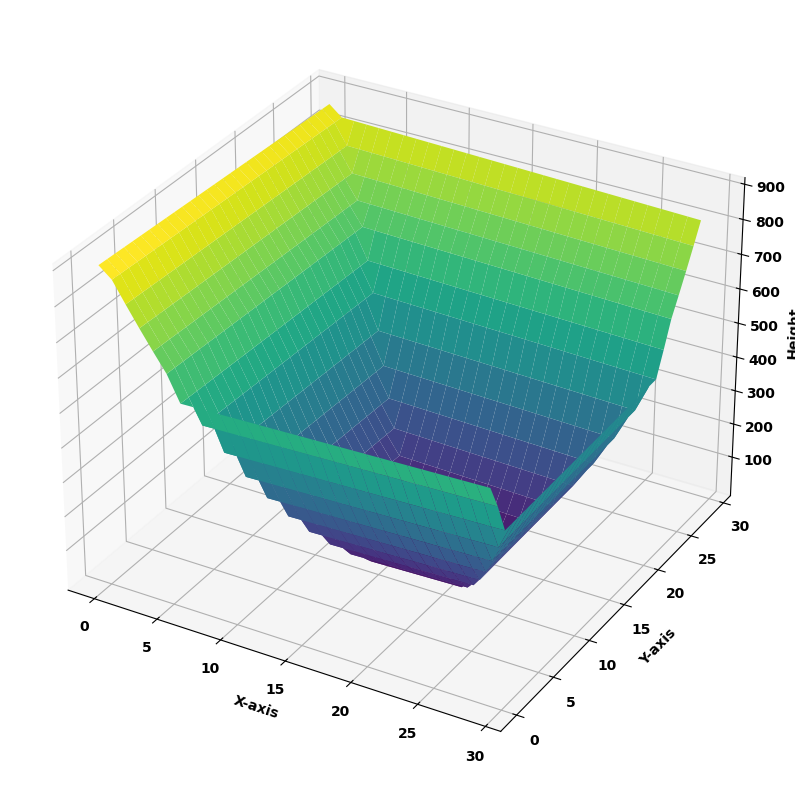

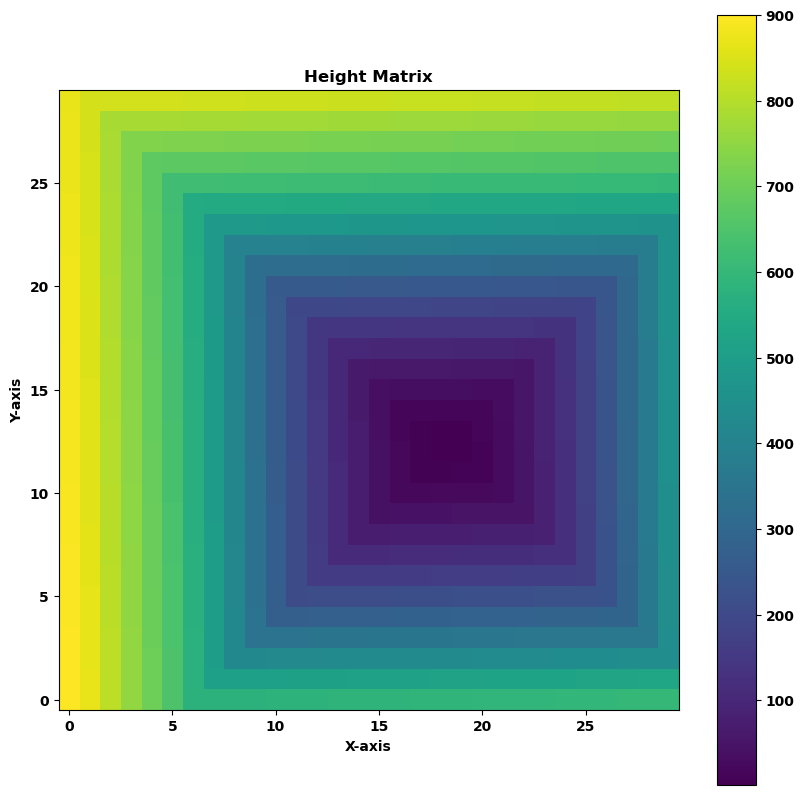

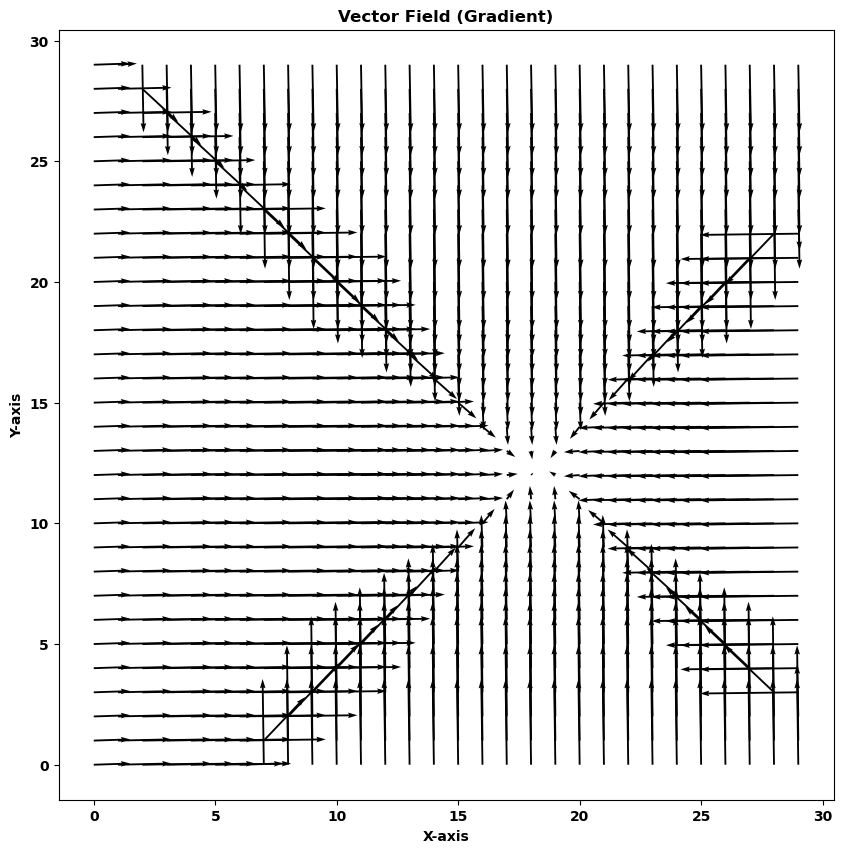

In [5]:
display_solution(matrix_1)

# Solution 2

In [6]:
grid_2 = get_grid(grid_size_x, grid_size_y)

number_of_valid_positions_on_grid = grid_size_x * grid_size_y

bfs_spiral_add_number_to_grid_inpendent_of_grid(
    grid_2, 
    number_of_valid_positions_on_grid, 
    position_start, 
    list_cycle_position_shift
)

matrix_2 = np.array(grid_2)
print(matrix_2)

[[1327 1186 1053  928  811  702  601  602  603  604  605  606  607  608  609  610  611  612  613  614  615  616  617  618  619  620  621  622  623  624]
 [1326 1185 1052  927  810  701  600  507  508  509  510  511  512  513  514  515  516  517  518  519  520  521  522  523  524  525  526  527  528  529]
 [1325 1184 1051  926  809  700  599  506  421  422  423  424  425  426  427  428  429  430  431  432  433  434  435  436  437  438  439  440  441  442]
 [1324 1183 1050  925  808  699  598  505  420  343  344  345  346  347  348  349  350  351  352  353  354  355  356  357  358  359  360  361  362  443]
 [1323 1182 1049  924  807  698  597  504  419  342  273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288  289  290  363  444]
 [1322 1181 1048  923  806  697  596  503  418  341  272  211  212  213  214  215  216  217  218  219  220  221  222  223  224  225  226  291  364  445]
 [1321 1180 1047  922  805  696  595  502  417  340  271  210  157  158  159  160 

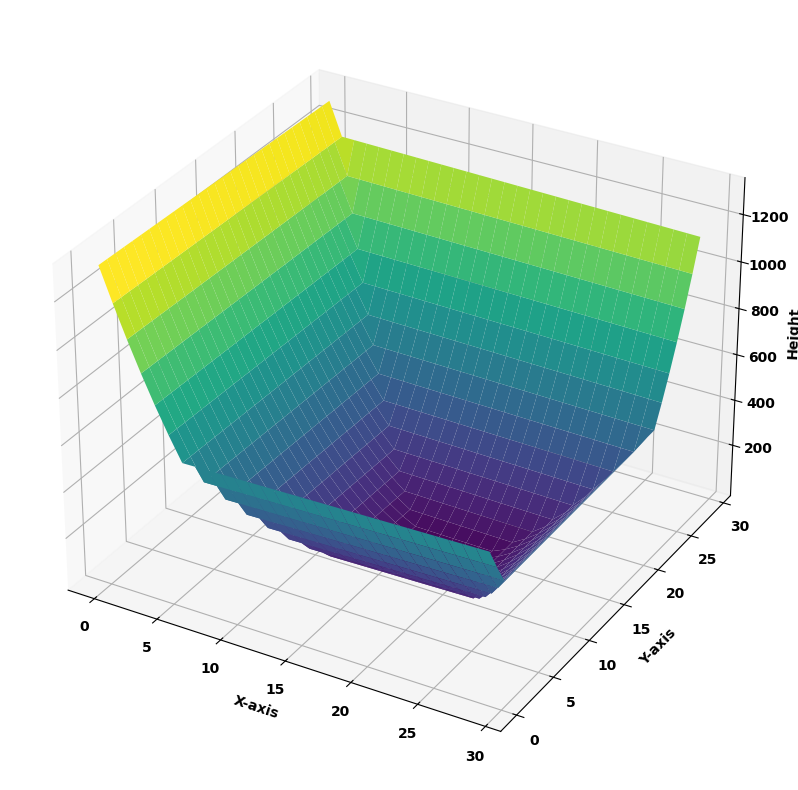

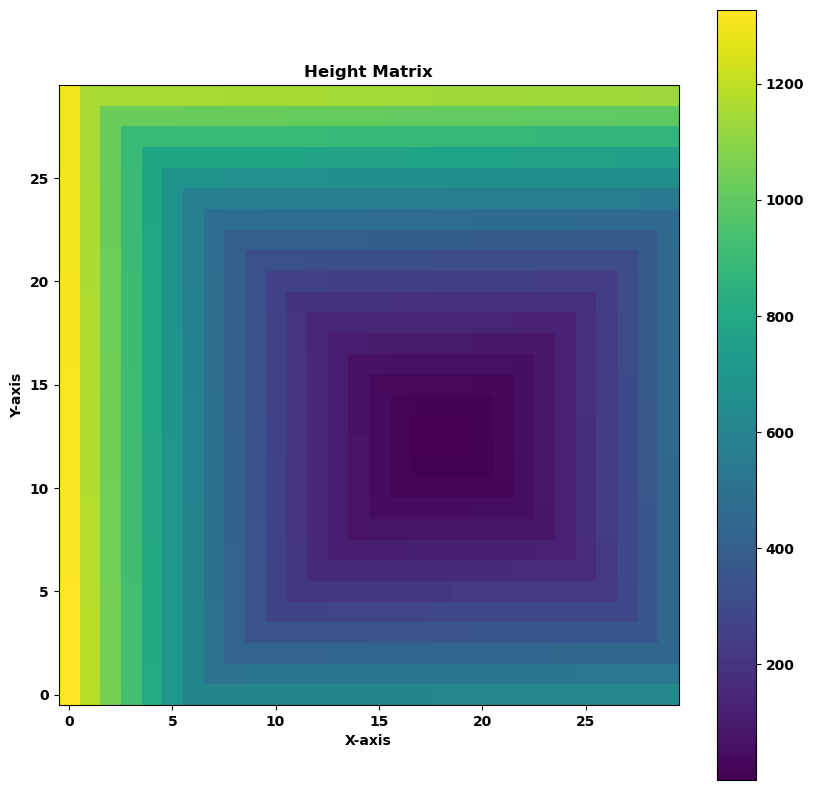

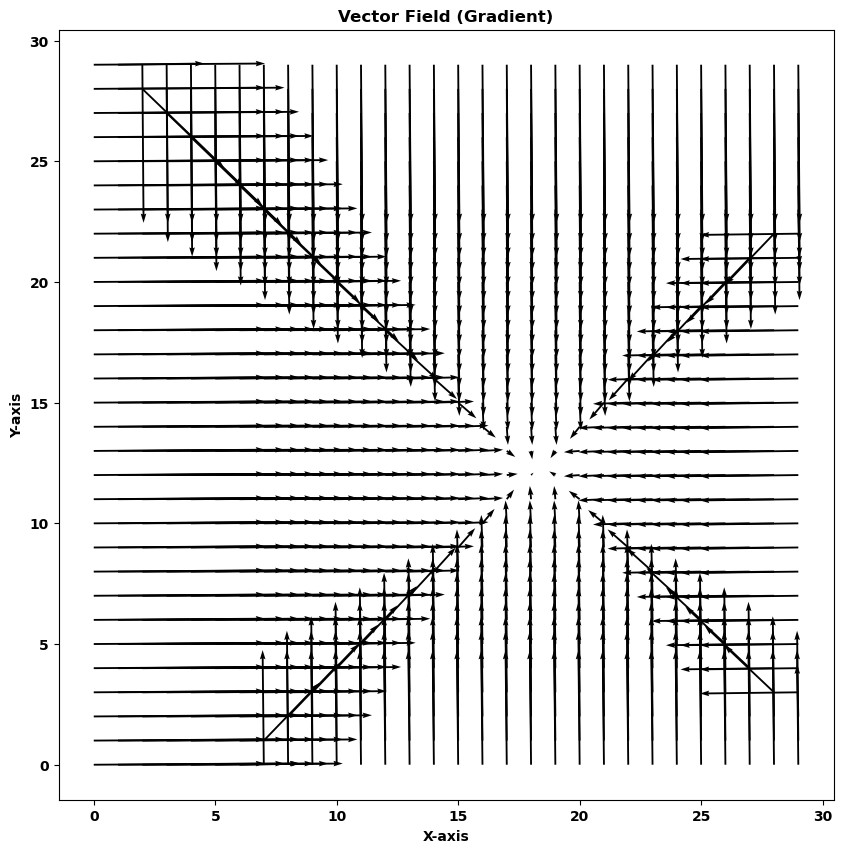

In [7]:
display_solution(matrix_2)

# Testing fun modifications

In [8]:
list_cycle_position_shift_custom = [
    (0, -1),  # Up
    (0, 1),  # Down
    (1, 0),  # Right
    (-1, 0),  # Left
    (1, -1),  # Up Right
    (-1, 1),  # Down Left
    (-1, -1),  # Up Left
    (1, 1),  # Down Right
]


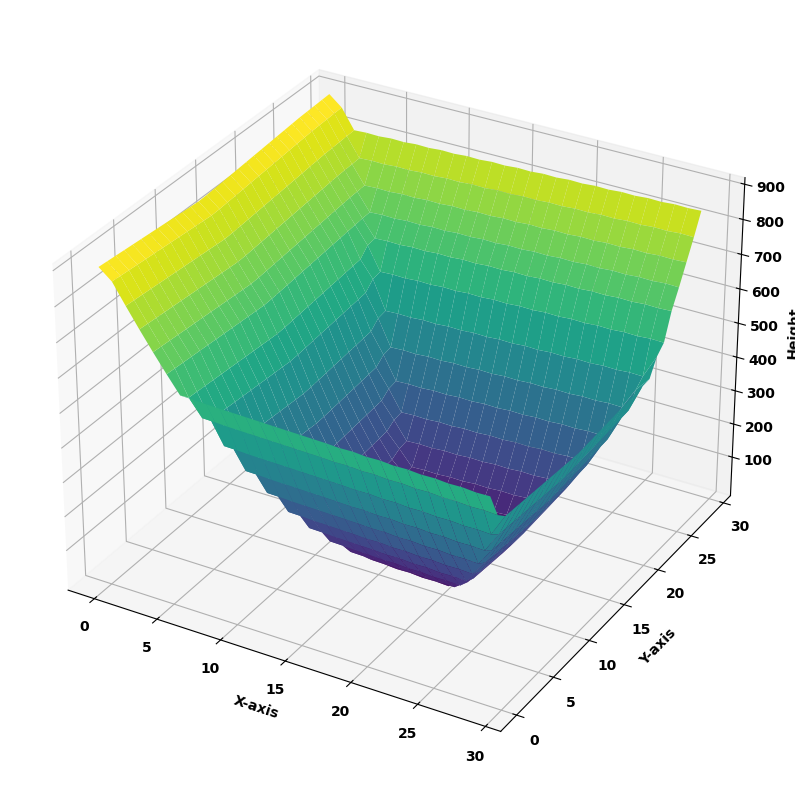

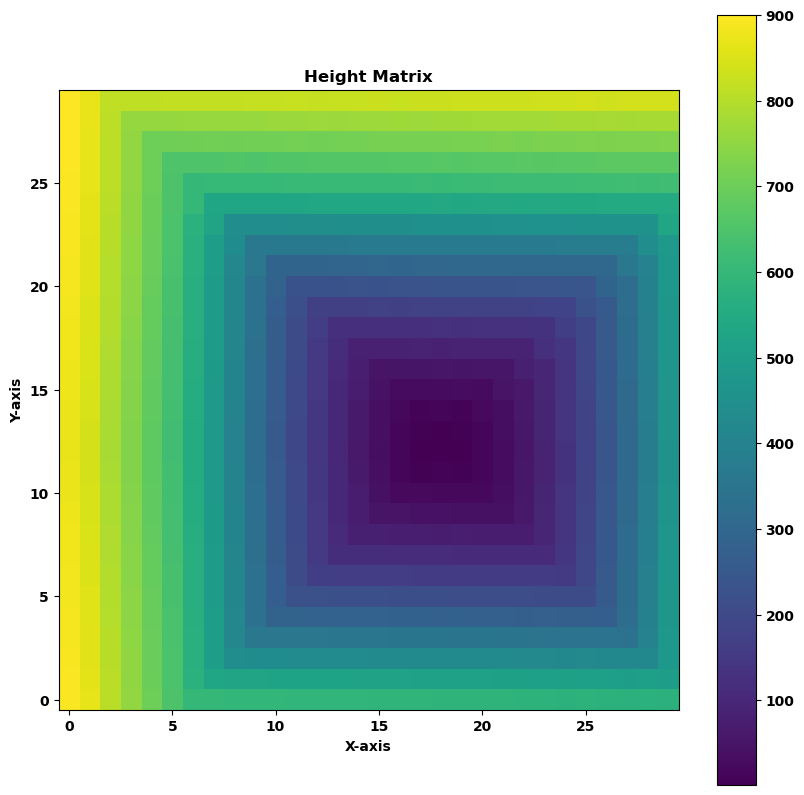

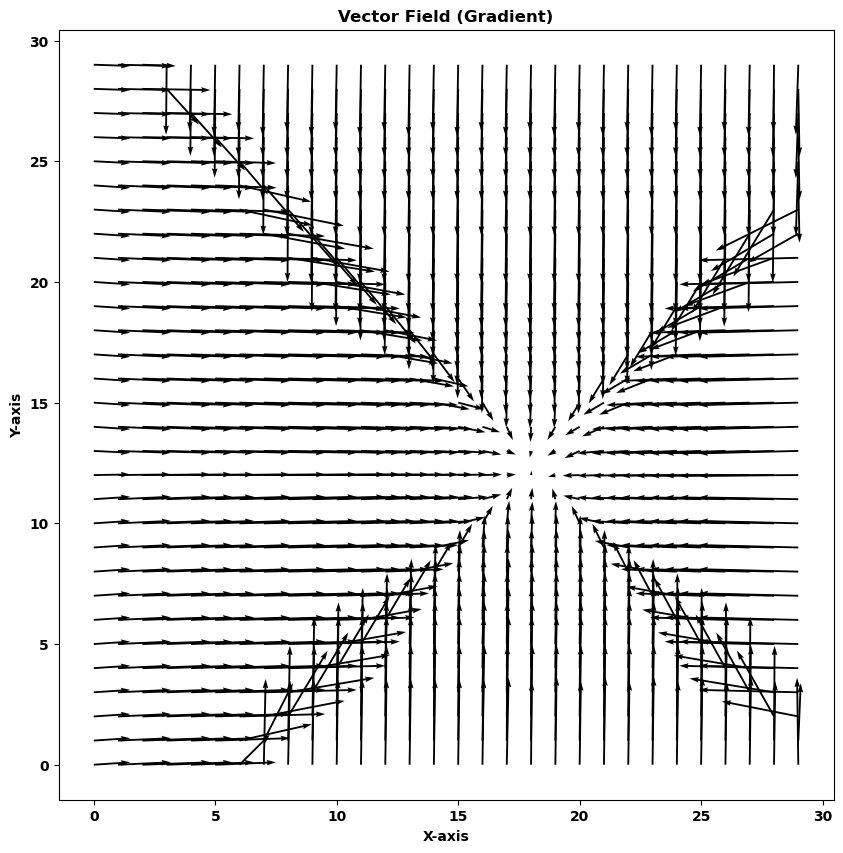

In [9]:
grid_3 = get_grid(grid_size_x, grid_size_y)

bfs_spiral_add_number_to_grid(
    grid_3, 
    position_start, 
    list_cycle_position_shift_custom
)

matrix_3 = np.array(grid_3)
display_solution((matrix_3))

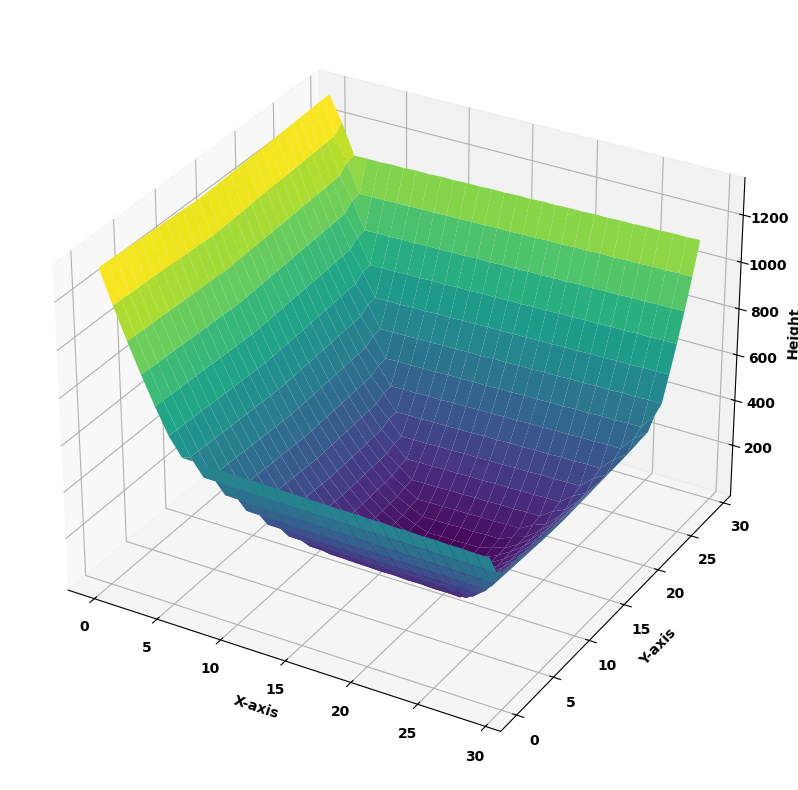

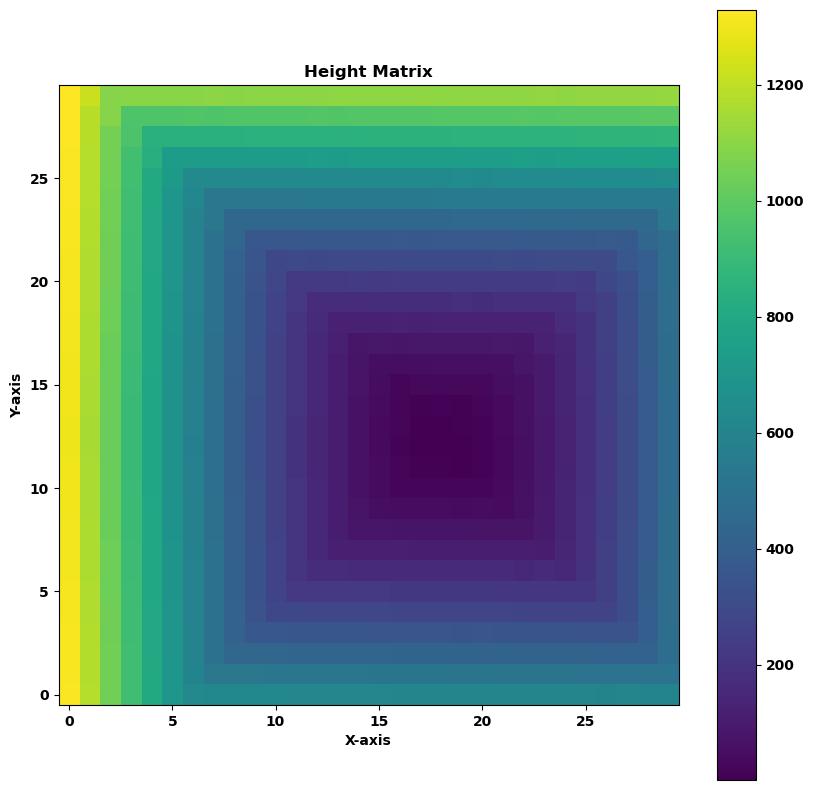

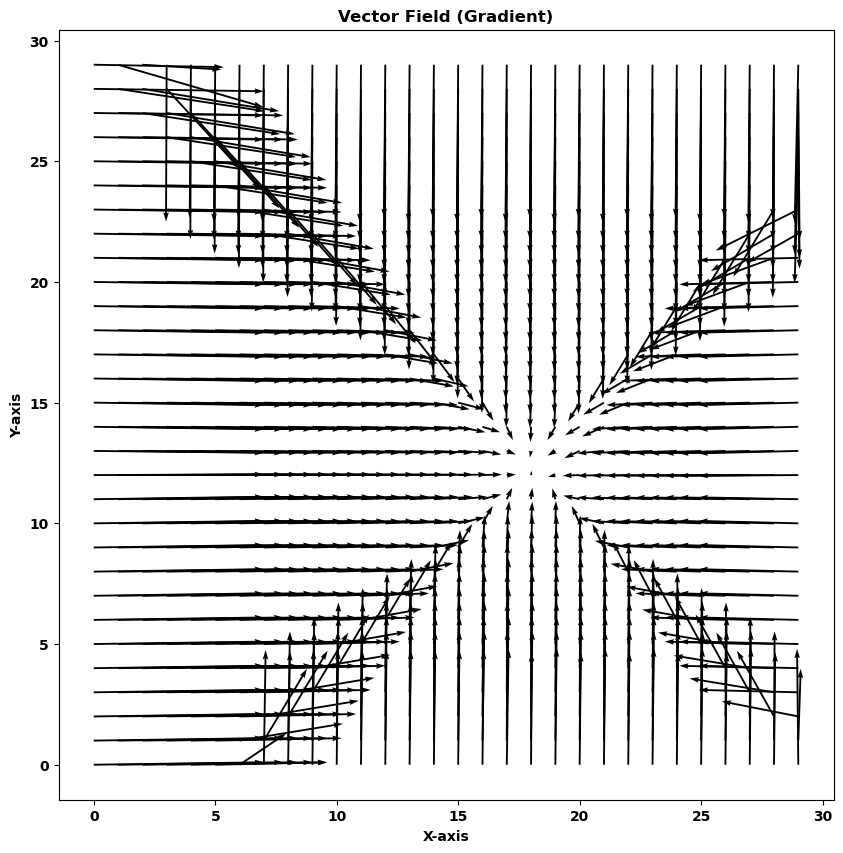

In [10]:
grid_4 = get_grid(grid_size_x, grid_size_y)

number_of_valid_positions_on_grid = grid_size_x * grid_size_y

bfs_spiral_add_number_to_grid_inpendent_of_grid(
    grid_4, 
    number_of_valid_positions_on_grid, 
    position_start, 
    list_cycle_position_shift_custom
)

matrix_4 = np.array(grid_4)
display_solution((matrix_4))
